# Exploratory Data Analysis on Return Data

## 1. Importing packages and reading dataset

### Importing packages and configuring plot settings

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

sns.set_context('notebook')
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
green='#228b22'
%matplotlib inline

### Reading and basic formatting on dataset

In [116]:
data = pd.read_excel('Price History_Commonwealth bank.xlsx', header=11)
print(len(data))
data.head(10)

2198


,Exchange Date,Close,%Chg,Volume
0,2012-01-03,51.162997,0.007924,3.186785e+06
1,2012-01-04,51.529780,0.007660,3.606286e+06
2,2012-01-05,50.596717,-0.006801,2.608491e+06
3,2012-01-06,50.360652,-0.002820,3.515135e+06
4,2012-01-09,50.292996,-0.002222,2.995256e+06
5,2012-01-10,51.036148,0.007692,3.044701e+06
6,2012-01-11,51.204936,0.003214,3.458455e+06
7,2012-01-12,51.318074,-0.000601,4.385028e+06
8,2012-01-13,51.343522,0.003206,2.610893e+06
9,2012-01-16,50.749396,-0.011184,3.976135e+06


## 2. Exploratory analysis on key columns

### a) Closing price column

In [117]:
price_col = data["Close"]
price_col.describe().round(4)

count    2198.0000
mean       59.4191
std         8.0732
min        31.6173
25%        53.6223
50%        58.1150
75%        65.4372
max        77.4251
Name: Close, dtype: float64

In [118]:
stats.skew(price_col)

0.006250384814669858

In [119]:
stats.kurtosis(price_col)

-0.1610083610421178

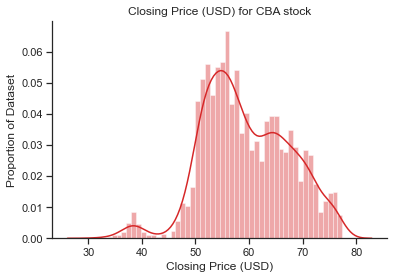

In [120]:
ax1 = sns.distplot(price_col, bins = 50, kde=True, color=red)
ax1.set_xlabel('Closing Price (USD)')
ax1.set_ylabel('Proportion of Dataset')
ax1.set_title('Closing Price (USD) for CBA stock')
ax1.set_xticks([], minor=True)
sns.despine()
plt.show()

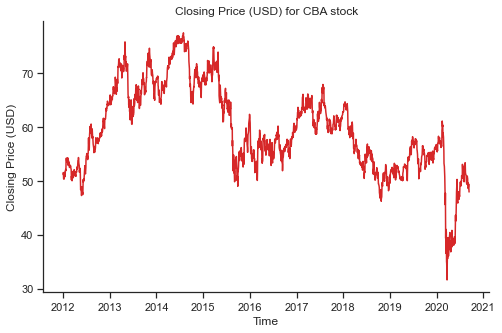

In [121]:
plt2, ax2 = plt.subplots(figsize=(8,5))
plt.plot(data["Exchange Date"], price_col, color=red)
ax2.set_xlabel('Time')
ax2.set_ylabel('Closing Price (USD)')
ax2.set_title('Closing Price (USD) for CBA stock')
ax2.set_xticks([], minor=True)
sns.despine()
plt.show()

### b) Percentage change column

In [122]:
change_col = data["%Chg"] * 100
change_col.describe().round(4)

count    2198.0000
mean        0.0219
std         1.3013
min       -10.0060
25%        -0.5922
50%         0.0506
75%         0.6735
max        13.2619
Name: %Chg, dtype: float64

In [123]:
stats.skew(change_col)

0.20795092065059403

In [124]:
stats.kurtosis(change_col)

13.701360809228735

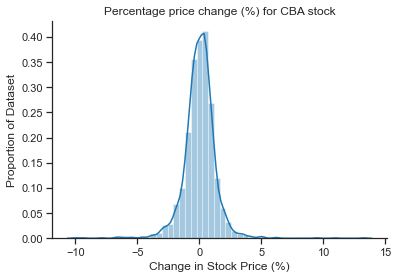

In [125]:
ax3 = sns.distplot(change_col, bins = 50, kde=True, color=blue)
ax3.set_xlabel('Change in Stock Price (%)')
ax3.set_ylabel('Proportion of Dataset')
ax3.set_title('Percentage price change (%) for CBA stock')
ax3.set_xticks([], minor=True)
sns.despine()
plt.show()

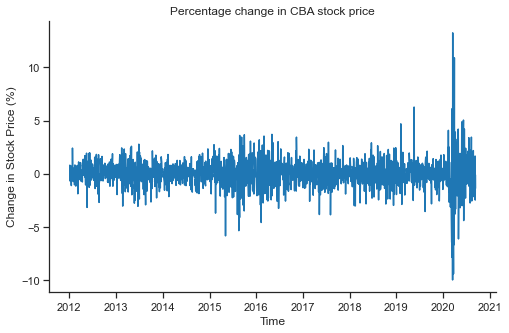

In [126]:
fig4, ax4 = plt.subplots(figsize=(8,5))
plt.plot(data["Exchange Date"], change_col, color=blue)
ax4.set_xlabel('Time')
ax4.set_ylabel('Change in Stock Price (%)')
ax4.set_title('Percentage change in CBA stock price')
ax4.set_xticks([], minor=True)
sns.despine()
plt.show()

### c) Volume column

In [127]:
volume_col = data["Volume"]
volume_col.describe().round(4)

count    2.198000e+03
mean     3.397252e+06
std      2.054749e+06
min      6.834970e+05
25%      2.276530e+06
50%      2.904897e+06
75%      3.847194e+06
max      3.561303e+07
Name: Volume, dtype: float64

In [128]:
stats.skew(volume_col)

4.836262532406086

In [129]:
stats.kurtosis(volume_col)

48.21355452357211

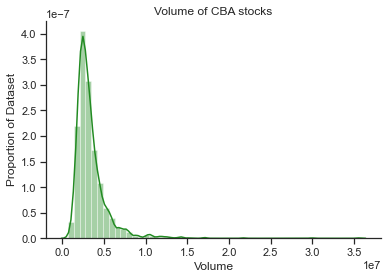

In [130]:
ax5 = sns.distplot(volume_col, bins = 50, kde=True, color=green)
ax5.set_xlabel('Volume')
ax5.set_ylabel('Proportion of Dataset')
ax5.set_title('Volume of CBA stocks')
ax5.set_xticks([], minor=True)
sns.despine()
plt.show()

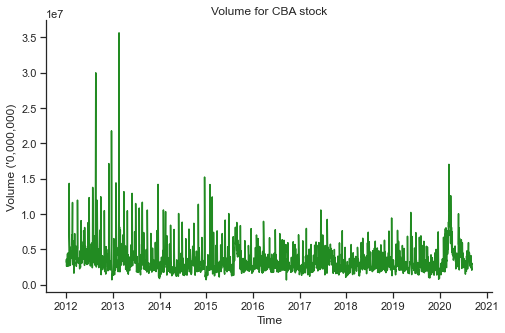

In [131]:
plt6, ax6 = plt.subplots(figsize=(8,5))
plt.plot(data["Exchange Date"], volume_col, color=green)
ax6.set_xlabel('Time')
ax6.set_ylabel("Volume ('0,000,000)")
ax6.set_title('Volume for CBA stock')
ax6.set_xticks([], minor=True)
sns.despine()
plt.show()

## 3. Further exploratory analysis with log transformations

### a) Log transformation of return column

In [137]:
log_price = price_col.apply(np.log)

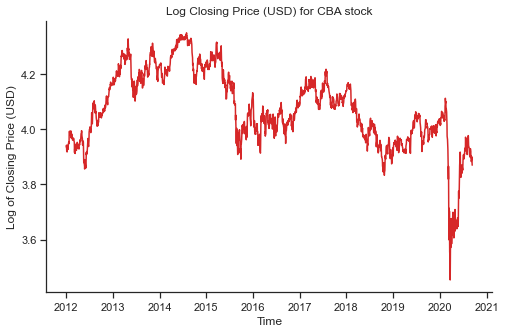

In [139]:
plt7, ax7 = plt.subplots(figsize=(8,5))
plt.plot(data["Exchange Date"], log_price, color=red)
ax7.set_xlabel('Time')
ax7.set_ylabel('Log of Closing Price (USD)')
ax7.set_title('Log Closing Price (USD) for CBA stock')
ax7.set_xticks([], minor=True)
sns.despine()
plt.show()

### b) Log transformation of percentage change column

In [154]:
change_shifted = change_col - (np.min(change_col) + 0.000001)
log_change = change_shifted.apply(np.log)

In [155]:
np.min(change_col)

-10.0060277275467

In [156]:
np.min(change_shifted)

-9.999999992515995e-07

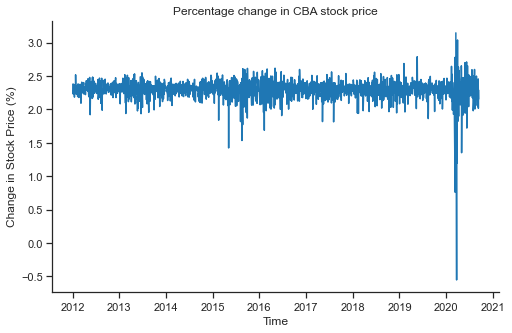

In [157]:
fig8, ax8 = plt.subplots(figsize=(8,5))
plt.plot(data["Exchange Date"], log_change, color=blue)
ax8.set_xlabel('Time')
ax8.set_ylabel('Change in Stock Price (%)')
ax8.set_title('Percentage change in CBA stock price')
ax8.set_xticks([], minor=True)
sns.despine()
plt.show()